In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
%config InlineBackend.figure_format = 'retina'

In [2]:
# Define encoder
def encoder(data, repeat=3):
    """
    data: data to be transmitted, it should be an 1-D array
    repeat: times of repetition of the string s
    """
    # Examples:
    # If data = [a,b,c] and repeat=3
    # The following returns [[a,b,c],[a,b,c],[a,b,c]]
    return np.tile(data,(repeat,1))

In [3]:
# Define binary decoder
def decoder(incoming):
    """
    incoming: data received, any array from encoder directly or channel
    """
    # How many repetitions from the binary encoder
    repeat = len(incoming)
    # Summing the incoming data along each column
    corrected = np.sum(incoming, axis=0)/repeat
    
    # Returns the reconstructed binary data 
    return (corrected>0.5).astype(int)

In [11]:
# Define noisy channel
def channel(incoming, noise=0.1):
    """
    incoming: data from binary encoder
    noisy: chance of flipping 1<->0
    """
    # How many repetitions from the binary encoder
    # Length of the original data
    repeat,data_len = incoming.shape
    
    # Step 2: Define noisy: the probability of filliping 1<->0
    noisy = np.random.binomial(1,noise,size=(repeat,data_len))
    
    # Step 3: Which element should flip sign
    taint = (incoming.astype(bool) == noisy.astype(bool))
    
    # Return the data after transmission
    return taint.astype(int)

In [6]:
# Importing Garfield cat binary data
data = open("data/garfield.txt","r")
bi_gar = data.readlines()
data.close()

# Handling text data into a numpy array
gar_raw=bi_gar[0].split(",")
gar_array=np.asfarray(gar_raw)

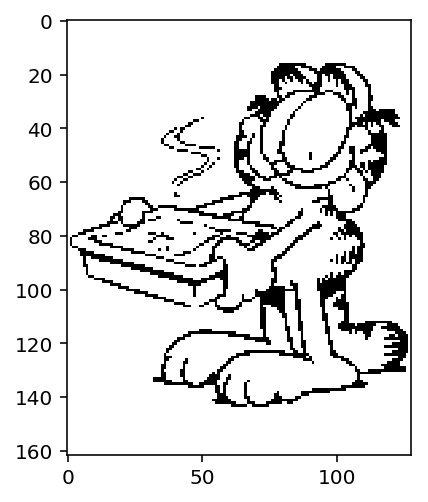

In [7]:
# Reshape the 1-D array into (162,128) array for plotting
plt.imshow(gar_array.reshape((162,128)),cmap="binary_r",interpolation="None")

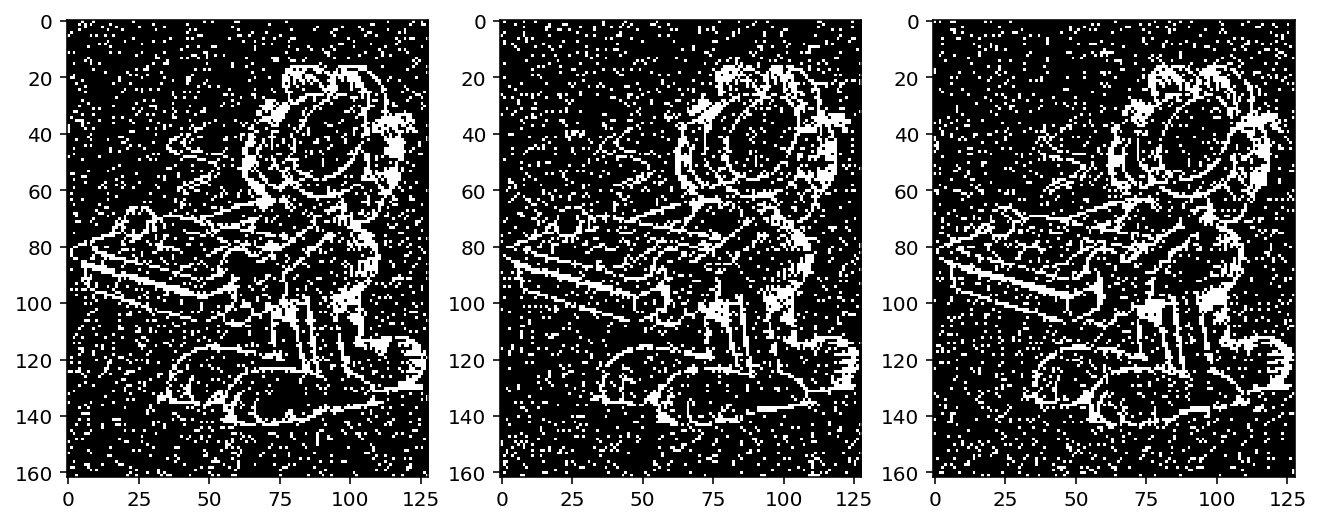

In [12]:
# Checking what happened after transmitting via the noisy channel
gar_noise=channel(encoder(gar_array))

plt.figure(figsize=(11,5))

for i in range(3):
    
    plt.subplot(1,3,i+1)
    plt.imshow(gar_noise[i].reshape((162,128)),cmap="binary_r",interpolation="None")

#plt.savefig("garfield_noisy.png",dpi=300,bbox_inches = 'tight')

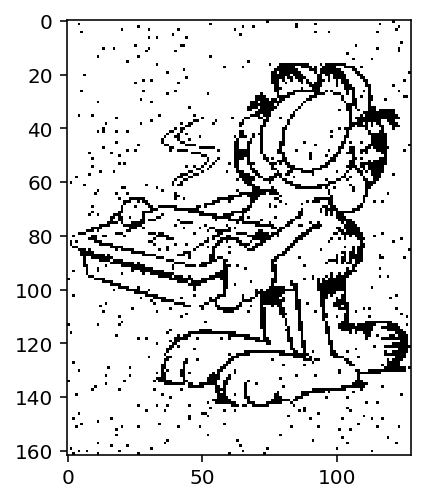

In [8]:
# Reconstructing the noisy Garfield by decoder
gar_re=decoder(gar_noise)

plt.imshow(gar_re.reshape((162,128)),cmap="binary_r",interpolation="None")
#plt.savefig("garfield_recons.png",dpi=300,bbox_inches = 'tight')

In [10]:
np.savetxt("test.txt",gar_noise[0],fmt="%d")

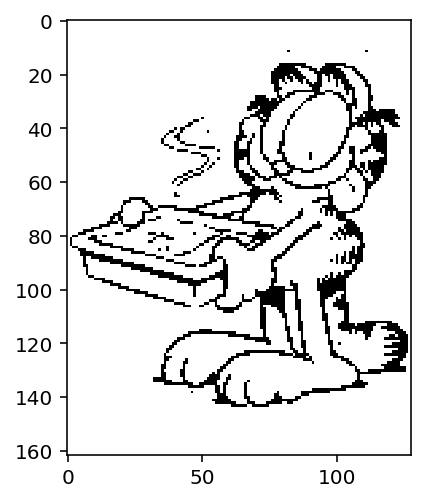

In [9]:
# Try repeat 11 times in the encoder and check the reconstruction by the decoder
gar_re_11=decoder(channel(encoder(gar_array,repeat = 11)))

plt.imshow(gar_re_11.reshape((162,128)),cmap="binary_r",interpolation="None")
#plt.savefig("garfield_recons_11.png",dpi=300,bbox_inches = 'tight')